In [4]:
import xarray as xr

def pre_process_trace_data(file_path):
    """
    Reads and preprocesses TraCE .nc data file.

    Parameters:
    file_path (str): Path to the .nc data file.

    Returns:
    xarray.Dataset: Preprocessed dataset with temperature in degrees Celsius and age in years BP.
    """
    # Import .nc data
    ds = xr.open_dataset(file_path)
    
    # Rename variables for clarity
    ds = ds.rename({'TREFHT': 'sat', 'time': 'age'})
    
    # Convert 'age' from model time to years BP (before present)
    ds['age'] = ds['age'] * -1000  # Assuming 'time' is in thousands of years
    
    # Convert temperature from Kelvin to Celsius
    ds['sat'] = ds['sat'] - 273.15
    
    # Keep only the 'sat' variable
    ds = ds[['sat']]
    
    return ds

trace_all_path='D:/VScode/Last_deglaciation/TraCE_data/trace.01-36.22000BP.cam2.TREFHT.22000BP_decavg_400BCE.nc'
trace_ghg_path='E:/TraCE_data/b30.00_4kaDVTk.cam2.ncrcat.ann_original_backup.nc'
trace_orb_path='D:/VScode/Last_deglaciation/TraCE_data/b30.00_4kaDVTj.cam2.ncrcat.ann.nc'
trace_icesheet_path='E:/TraCE_data/b30.00_4kaDVTz.cam2.ncrcat.ann_original_backup.nc'
trace_fwf_path='E:/TraCE_data/b30.00_4kaDVTn.cam2.ncrcat.ann_original_backup.nc'

ds_trace_all = pre_process_trace_data(trace_all_path)
ds_trace_ghg = pre_process_trace_data(trace_ghg_path)
ds_trace_orb = pre_process_trace_data(trace_orb_path)
ds_trace_icesheet = pre_process_trace_data(trace_icesheet_path)
ds_trace_fwf = pre_process_trace_data(trace_fwf_path)

trace_all_age=ds_trace_all['age'].values
trace_ghg_age=ds_trace_ghg['age'].values
trace_orb_age=ds_trace_orb['age'].values
trace_icesheet_age=ds_trace_icesheet['age'].values
trace_fwf_age=ds_trace_fwf['age'].values

# save these ages using pickle
import pickle
with open('trace_all_age.pkl', 'wb') as f:
    pickle.dump(trace_all_age, f)
with open('trace_ghg_age.pkl', 'wb') as f:
    pickle.dump(trace_ghg_age, f)
with open('trace_orb_age.pkl', 'wb') as f:
    pickle.dump(trace_orb_age, f)
with open('trace_icesheet_age.pkl', 'wb') as f:
    pickle.dump(trace_icesheet_age, f)
with open('trace_fwf_age.pkl', 'wb') as f:
    pickle.dump(trace_fwf_age, f)


In [5]:
# read the trace ages under 'TraCE_data'
import pickle
with open('TraCE_data/trace_all_age.pkl', 'rb') as f:
    trace_all_age=pickle.load(f)

with open('TraCE_data/trace_ghg_age.pkl', 'rb') as f:
    trace_ghg_age=pickle.load(f)

with open('TraCE_data/trace_orb_age.pkl', 'rb') as f:
    trace_orb_age=pickle.load(f)

with open('TraCE_data/trace_icesheet_age.pkl', 'rb') as f:
    trace_icesheet_age=pickle.load(f)

with open('TraCE_data/trace_fwf_age.pkl', 'rb') as f:
    trace_fwf_age=pickle.load(f)



In [1]:
import pickle

# Read the pickle files
with open('TraCE_data/TraCE_all_weighted_avg_LGMR_mask.pkl', 'rb') as f:
    TraCE_all_weighted_avg_LGMR_mask = pickle.load(f)

with open('TraCE_data/TraCE_ghg_weighted_avg_LGMR_mask.pkl', 'rb') as f:
    TraCE_ghg_weighted_avg_LGMR_mask = pickle.load(f)

with open('TraCE_data/TraCE_orb_weighted_avg_LGMR_mask.pkl', 'rb') as f:
    TraCE_orb_weighted_avg_LGMR_mask = pickle.load(f)

with open('TraCE_data/TraCE_icesheet_weighted_avg_LGMR_mask.pkl', 'rb') as f:
    TraCE_icesheet_weighted_avg_LGMR_mask = pickle.load(f)

with open('TraCE_data/TraCE_fwf_weighted_avg_LGMR_mask.pkl', 'rb') as f:
    TraCE_fwf_weighted_avg_LGMR_mask = pickle.load(f)

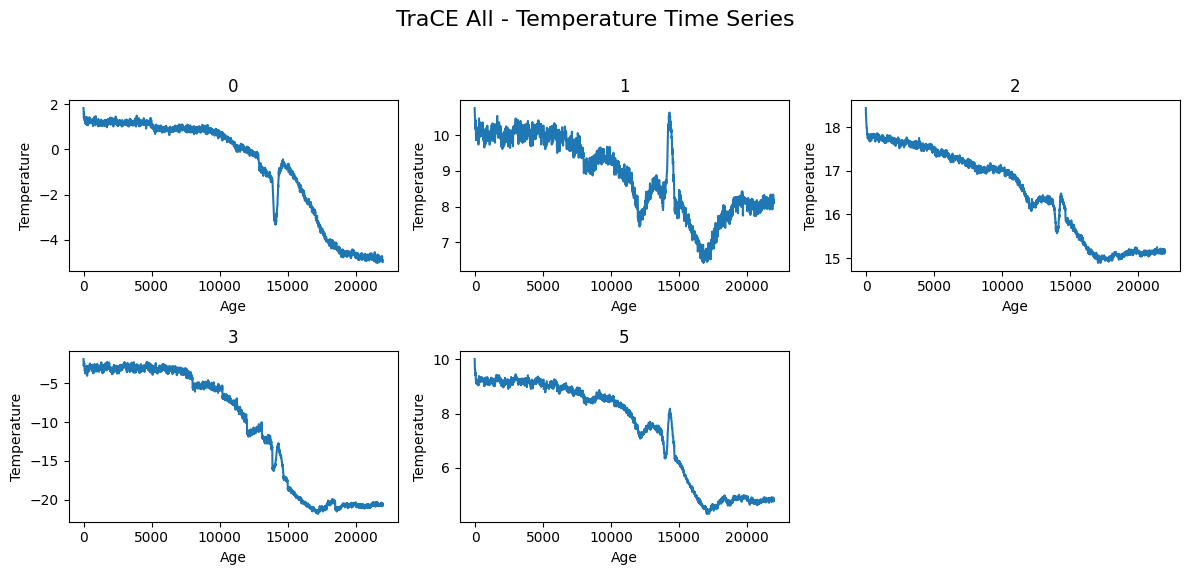

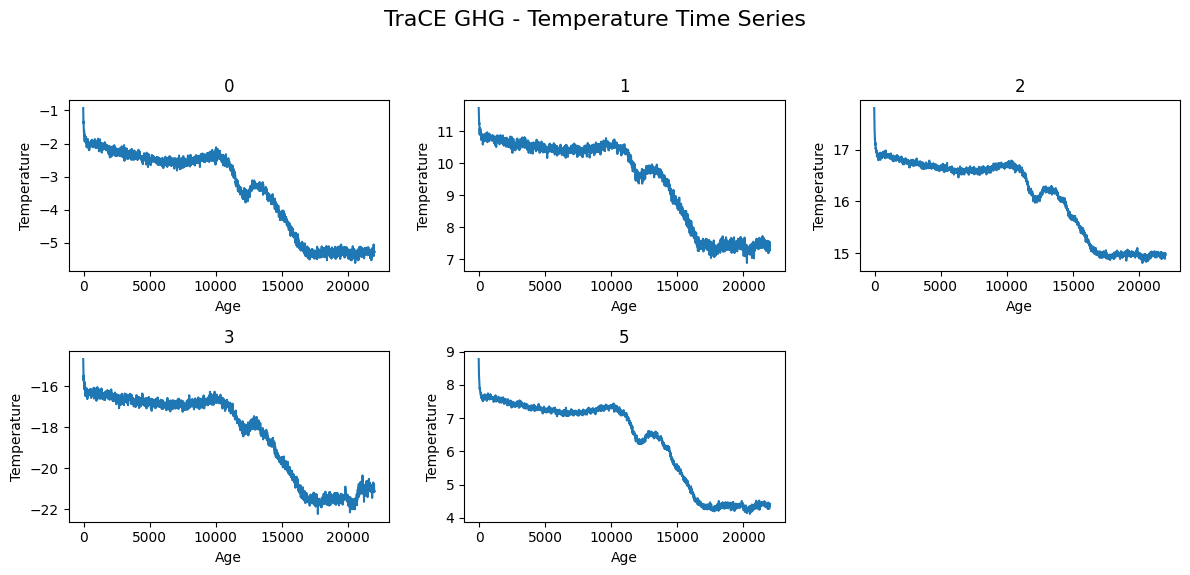

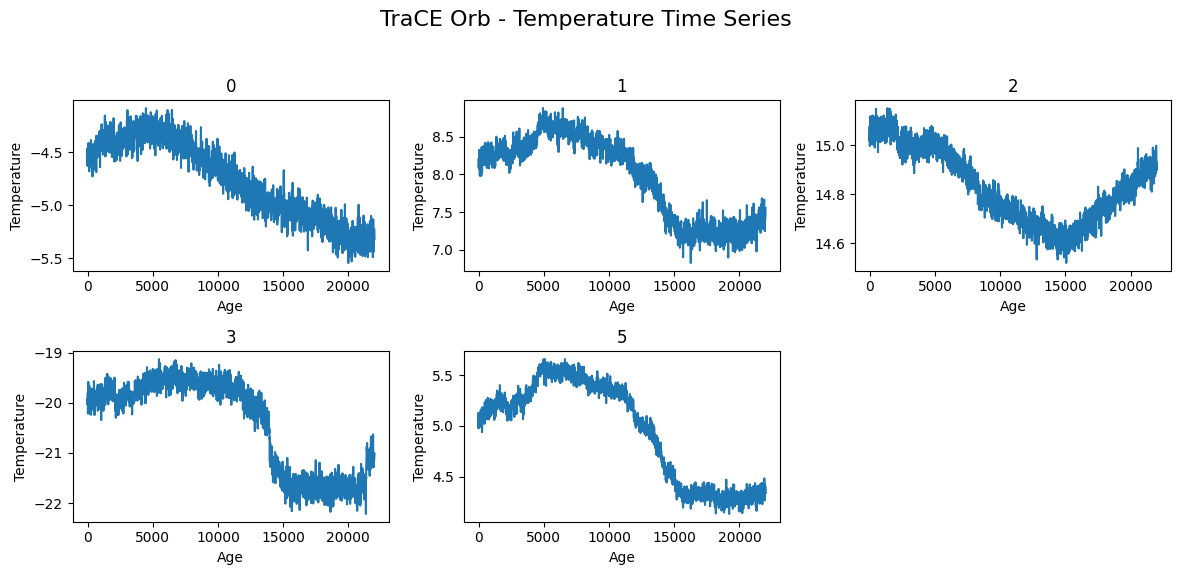

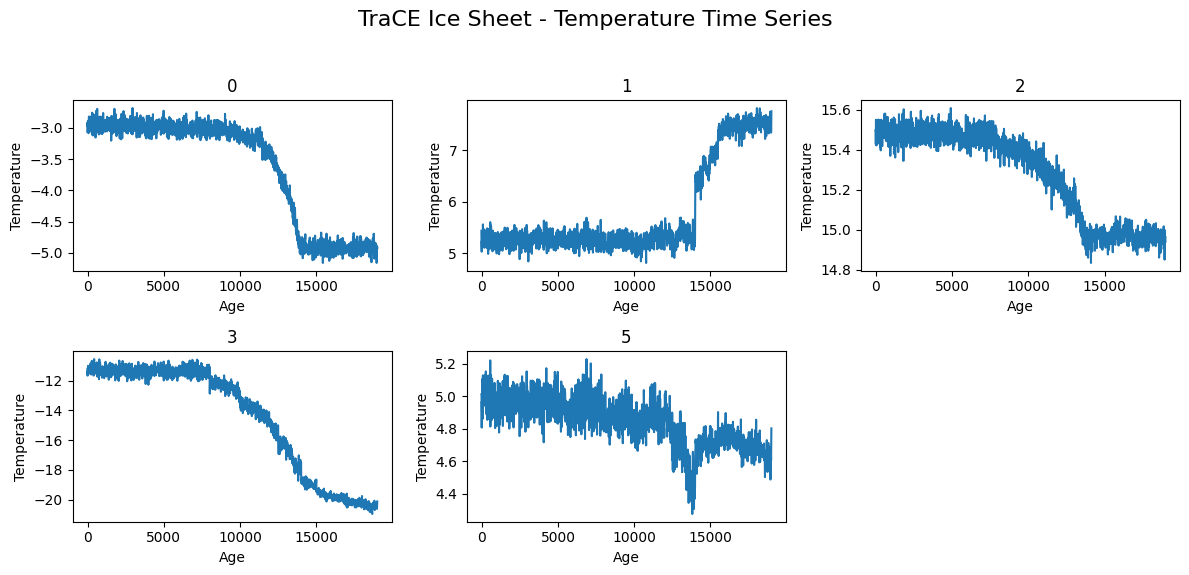

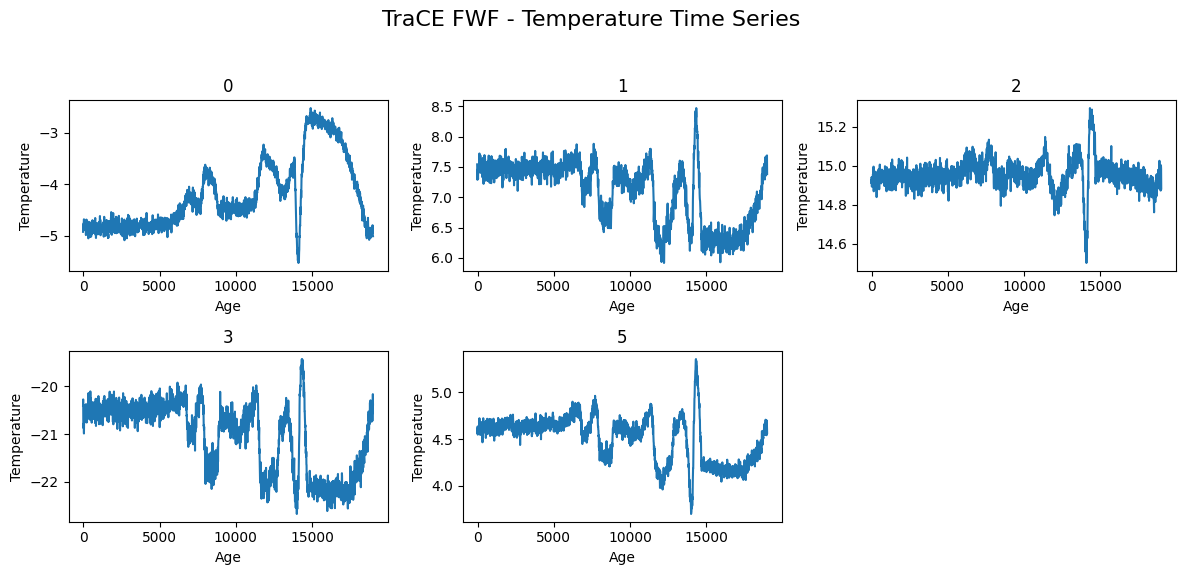

In [8]:
import pickle
import math
import matplotlib.pyplot as plt



# ===============================
# Function to plot the temperature time series for a given dict.
# ===============================
def plot_temp_time_series(age, temp_dict, fig_title):
    """
    Creates a figure with subplots for each key in temp_dict.
    Each subplot shows the temperature time series (y-axis) vs. age (x-axis).

    Parameters:
      age       : array-like, the age/time values for the x-axis.
      temp_dict : dict, keys represent different regions or indices, 
                  and each value is a time series (list/array) of temperature.
      fig_title : str, the title for the entire figure.
    """
    n_series = len(temp_dict)
    
    # Determine grid size for subplots
    n_cols = math.ceil(math.sqrt(n_series))
    n_rows = math.ceil(n_series / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
    # Flatten axes in case of a 2D array (if only one subplot, make it a list)
    if n_series > 1:
        axes = axes.flatten()
    else:
        axes = [axes]
    
    for i, (key, temp_series) in enumerate(temp_dict.items()):
        axes[i].plot(age, temp_series, color='tab:blue')
        axes[i].set_title(str(key))
        axes[i].set_xlabel("Age")
        axes[i].set_ylabel("Temperature")
    
    # Remove any unused subplots (if total grid cells > n_series)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    fig.suptitle(fig_title, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# ===============================
# Plot each dict in a separate figure
# ===============================
plot_temp_time_series(trace_all_age, TraCE_all_weighted_avg_LGMR_mask, 'TraCE All - Temperature Time Series')
plot_temp_time_series(trace_ghg_age, TraCE_ghg_weighted_avg_LGMR_mask, 'TraCE GHG - Temperature Time Series')
plot_temp_time_series(trace_orb_age, TraCE_orb_weighted_avg_LGMR_mask, 'TraCE Orb - Temperature Time Series')
plot_temp_time_series(trace_icesheet_age, TraCE_icesheet_weighted_avg_LGMR_mask, 'TraCE Ice Sheet - Temperature Time Series')
plot_temp_time_series(trace_fwf_age, TraCE_fwf_weighted_avg_LGMR_mask, 'TraCE FWF - Temperature Time Series')


# Covert the dicts to nd arrays and crop (optional)

In [17]:
import numpy as np

def extract_first_four_to_array(trace_dict):
    """
    Extracts the first four keys (sorted numerically) from a dictionary 
    and returns them as a NumPy array.

    Parameters:
        trace_dict (dict): Dictionary with numerical keys and time series as values.

    Returns:
        np.ndarray: Array of shape (4, n) containing the first four time series.
    """
    sorted_keys = sorted(trace_dict.keys())
    first_four_keys = sorted_keys[:4]
    return np.array([trace_dict[key] for key in first_four_keys])

# Apply to each TraCE dataset
trace_all_array = extract_first_four_to_array(TraCE_all_weighted_avg_LGMR_mask)
trace_ghg_array = extract_first_four_to_array(TraCE_ghg_weighted_avg_LGMR_mask)
trace_orb_array = extract_first_four_to_array(TraCE_orb_weighted_avg_LGMR_mask)
trace_icesheet_array = extract_first_four_to_array(TraCE_icesheet_weighted_avg_LGMR_mask)
trace_fwf_array = extract_first_four_to_array(TraCE_fwf_weighted_avg_LGMR_mask)


trace_all_array = trace_all_array.T
trace_ghg_array = trace_ghg_array.T
trace_orb_array = trace_orb_array.T
trace_icesheet_array = trace_icesheet_array.T
trace_fwf_array = trace_fwf_array.T

trace_all_array.shape

(2204, 4)

In [18]:
# Crop all columns of the array for the corresponding age>=170000
cutoff=170000
trace_all_array_cropped = trace_all_array[trace_all_age>=17000,:]
trace_ghg_array_cropped = trace_ghg_array[trace_ghg_age>=17000,:]
trace_orb_array_cropped = trace_orb_array[trace_orb_age>=17000,:]
trace_icesheet_array_cropped = trace_icesheet_array[trace_icesheet_age>=17000,:]
trace_fwf_array_cropped = trace_fwf_array[trace_fwf_age>=17000,:]

# trace_all_array_cropped.shape

# PCMCI on TraCE data

In [20]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
# from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI




def doing_PCMCI(data,show_timeseries=True, show_scatter_plot=True):
    # different each median
    data = np.diff(data, axis=0)

    var_names = ['class 1', 'class 2', 'class 3', 'class 4']

    # Create a DataFrame object
    dataframe = pp.DataFrame(data, 
                            datatime={0: np.arange(len(data))}, 
                            var_names=var_names)


    if show_timeseries:
        tp.plot_timeseries(dataframe); plt.show()

    parcorr = ParCorr(significance='analytic')
    pcmci = PCMCI(
        dataframe=dataframe, 
        cond_ind_test=parcorr,
        verbosity=1)


    matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
    if show_scatter_plot:
        tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()
    # correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
    # lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
    #                                     'x_base':5, 'y_base':.5}); plt.show()



    pcmci.verbosity = 1
    tau_min=1
    tau_max=3
    results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.05)

    tp.plot_graph(
        val_matrix=results['val_matrix'],
        graph=results['graph'],
        var_names=var_names,
        link_colorbar_label='cross-MCI',
        node_colorbar_label='auto-MCI',
        show_autodependency_lags=False
        )
    plt.show()




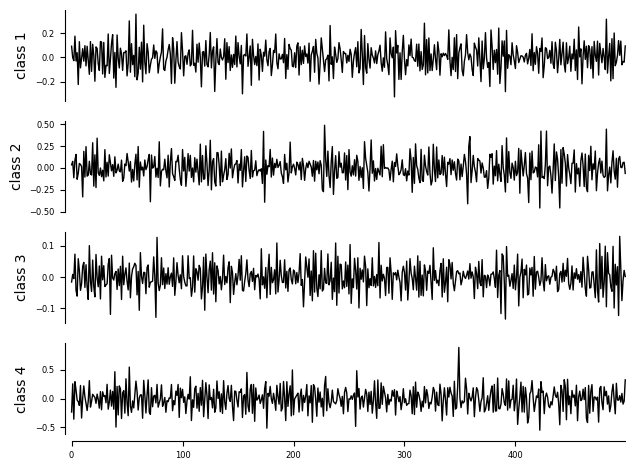

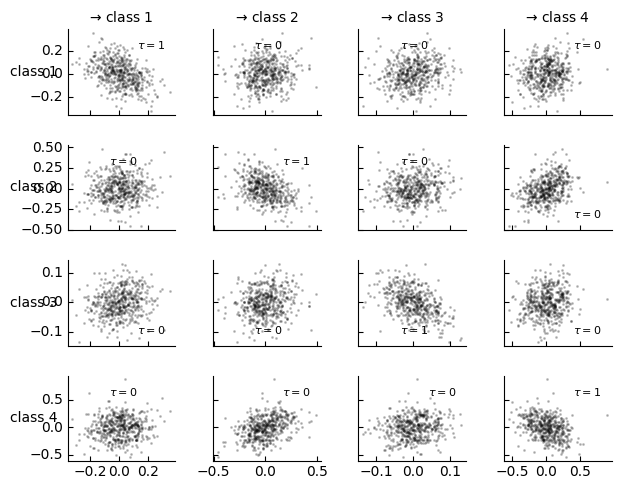


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable class 1 has 5 link(s):
    [pc_alpha = 0.4]
        (class 1 -1): max_pval = 0.00000, |min_val| =  0.413
        (class 4 -3): max_pval = 0.14631, |min_val| =  0.066
        (class 1 -3): max_pval = 0.18512, |min_val| =  0.060
        (class 3 -2): max_pval = 0.32165, |min_val| =  0.045
        (class 1 -2): max_pval = 0.36098, |min_val| =  0.041

    Variable class 2 has 4 link(s):
    [pc_alpha = 0.3]
        (class 2 -1): max_pval = 0.00000, |min_val| =  0.364
        (class 2 -3): max_pval = 0.12256, |min_val| =  0.070
        (class 2 -2): max_pval = 0.28610, |min_val| =  0.048
        (class 1 -3): max_pval = 0.29788, |min_val| =  0.047

    Variable class 3 has 4 link(s):
    [pc_alpha = 0.5]
        (class 3 -1

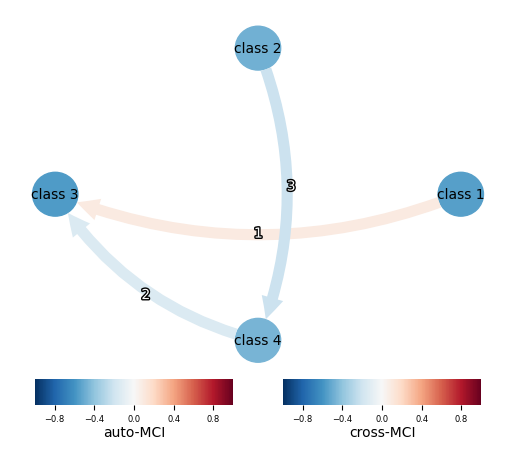

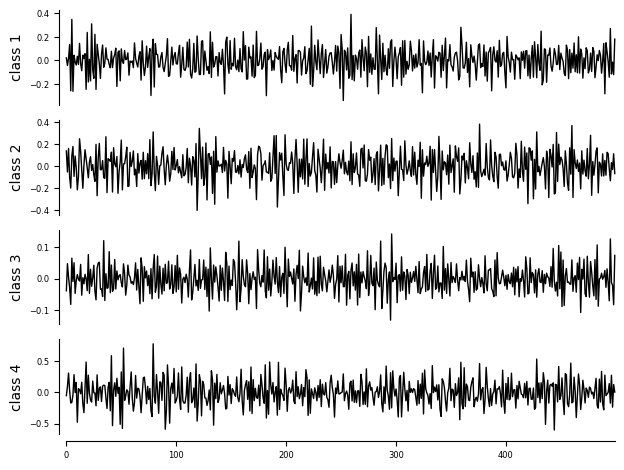

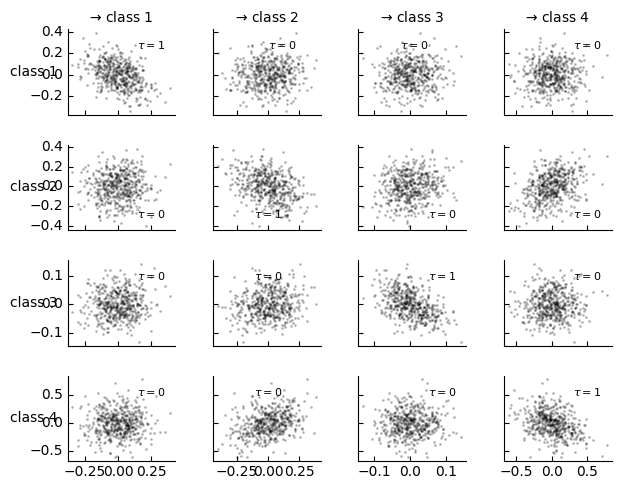


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable class 1 has 3 link(s):
    [pc_alpha = 0.05]
        (class 1 -1): max_pval = 0.00000, |min_val| =  0.406
        (class 1 -2): max_pval = 0.00013, |min_val| =  0.171
        (class 2 -1): max_pval = 0.00198, |min_val| =  0.139

    Variable class 2 has 5 link(s):
    [pc_alpha = 0.3]
        (class 2 -1): max_pval = 0.00000, |min_val| =  0.343
        (class 2 -2): max_pval = 0.04310, |min_val| =  0.091
        (class 2 -3): max_pval = 0.13028, |min_val| =  0.068
        (class 3 -1): max_pval = 0.15324, |min_val| =  0.064
        (class 4 -2): max_pval = 0.20004, |min_val| =  0.058

    Variable class 3 has 4 link(s):
    [pc_alpha = 0.4]
        (class 3 -1): max_pval = 0.00000, |min_val| =  0.457
        (class 1 -

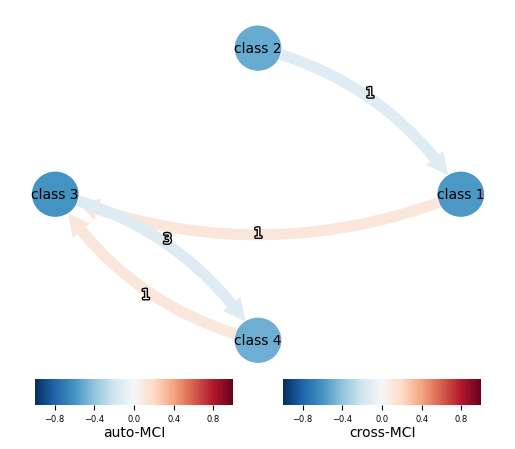

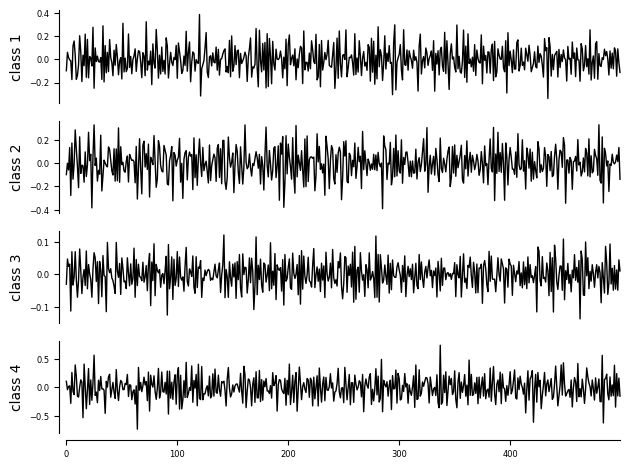

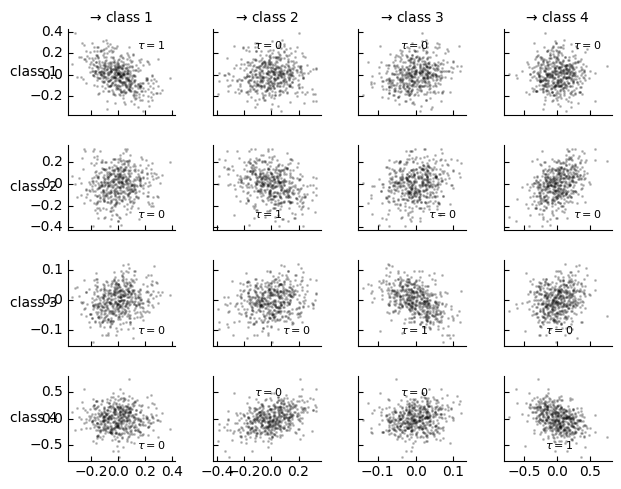


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable class 1 has 2 link(s):
    [pc_alpha = 0.1]
        (class 1 -1): max_pval = 0.00000, |min_val| =  0.445
        (class 4 -1): max_pval = 0.09656, |min_val| =  0.075

    Variable class 2 has 4 link(s):
    [pc_alpha = 0.2]
        (class 2 -1): max_pval = 0.00000, |min_val| =  0.307
        (class 2 -2): max_pval = 0.00056, |min_val| =  0.155
        (class 1 -1): max_pval = 0.18539, |min_val| =  0.060
        (class 2 -3): max_pval = 0.19828, |min_val| =  0.058

    Variable class 3 has 3 link(s):
    [pc_alpha = 0.2]
        (class 3 -1): max_pval = 0.00000, |min_val| =  0.472
        (class 2 -2): max_pval = 0.08679, |min_val| =  0.077
        (class 3 -3): max_pval = 0.15133, |min_val| =  0.065

    Variable class

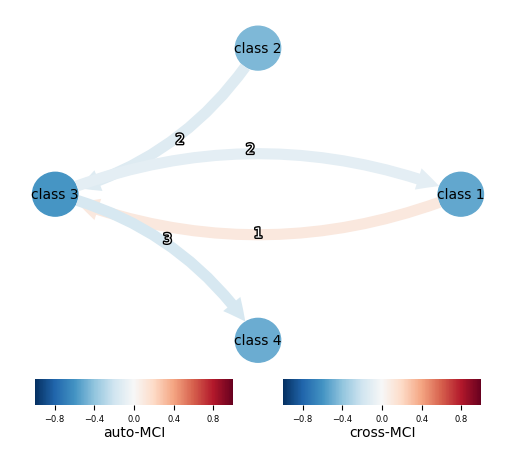

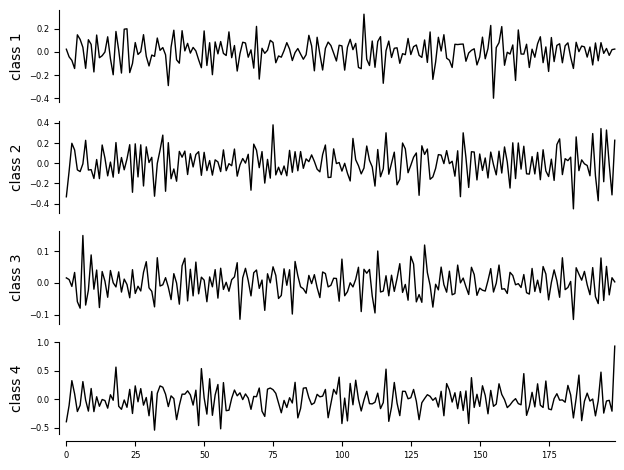

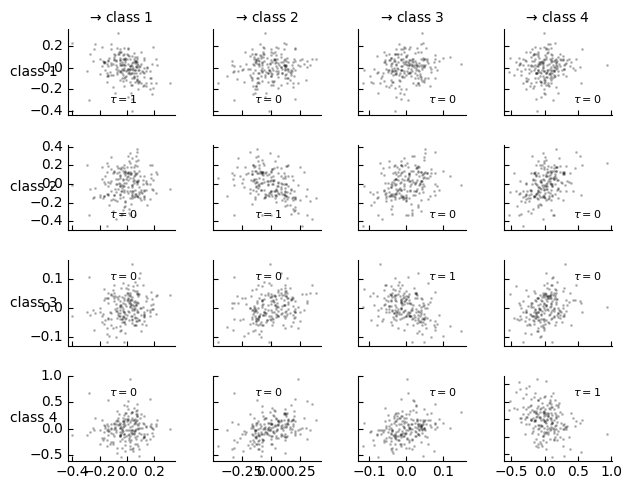


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable class 1 has 2 link(s):
    [pc_alpha = 0.05]
        (class 1 -1): max_pval = 0.00000, |min_val| =  0.357
        (class 1 -2): max_pval = 0.00885, |min_val| =  0.187

    Variable class 2 has 2 link(s):
    [pc_alpha = 0.1]
        (class 2 -1): max_pval = 0.00000, |min_val| =  0.469
        (class 1 -2): max_pval = 0.06022, |min_val| =  0.136

    Variable class 3 has 3 link(s):
    [pc_alpha = 0.05]
        (class 3 -1): max_pval = 0.00000, |min_val| =  0.356
        (class 3 -2): max_pval = 0.03823, |min_val| =  0.149
        (class 1 -3): max_pval = 0.04225, |min_val| =  0.147

    Variable class 4 has 3 link(s):
    [pc_alpha = 0.4]
        (class 4 -1): max_pval = 0.00000, |min_val| =  0.323
        (class 4 -2)

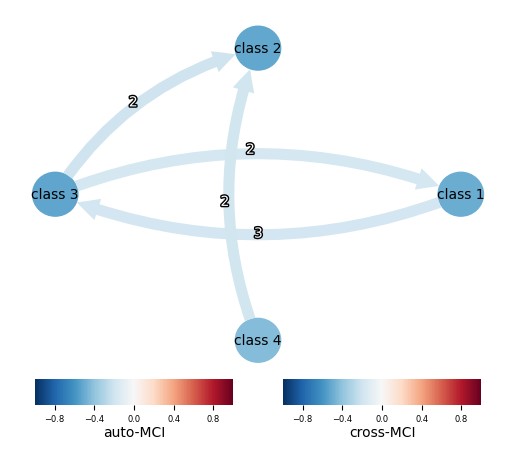

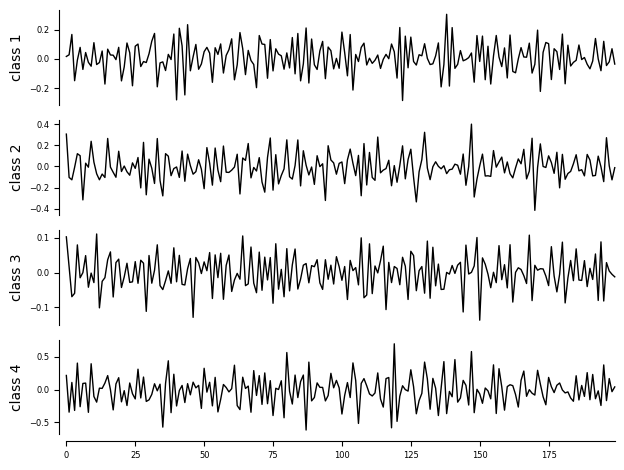

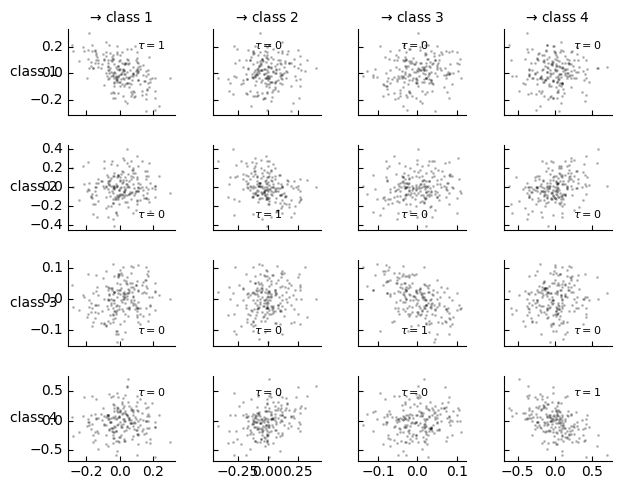


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable class 1 has 5 link(s):
    [pc_alpha = 0.2]
        (class 1 -1): max_pval = 0.00000, |min_val| =  0.486
        (class 4 -3): max_pval = 0.10335, |min_val| =  0.118
        (class 3 -3): max_pval = 0.10702, |min_val| =  0.117
        (class 2 -1): max_pval = 0.15149, |min_val| =  0.104
        (class 4 -1): max_pval = 0.16801, |min_val| =  0.099

    Variable class 2 has 2 link(s):
    [pc_alpha = 0.05]
        (class 2 -1): max_pval = 0.00000, |min_val| =  0.352
        (class 2 -2): max_pval = 0.01544, |min_val| =  0.174

    Variable class 3 has 4 link(s):
    [pc_alpha = 0.5]
        (class 3 -1): max_pval = 0.00000, |min_val| =  0.539
        (class 4 -2): max_pval = 0.14617, |min_val| =  0.105
        (class 2 -

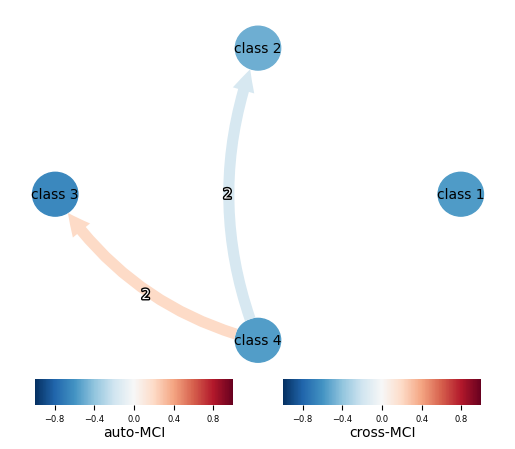

In [21]:
doing_PCMCI(trace_all_array_cropped)
doing_PCMCI(trace_ghg_array_cropped)
doing_PCMCI(trace_orb_array_cropped)
doing_PCMCI(trace_icesheet_array_cropped)
doing_PCMCI(trace_fwf_array_cropped)